# Prepare dataset

In [60]:
# load dataset from ThreeBibas/recipie-mask-image-inverted
from datasets import load_dataset

ds = load_dataset("ThreeBibas/recipie-mask-image-inverted")
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'conditioning_image', 'image'],
        num_rows: 687
    })
})

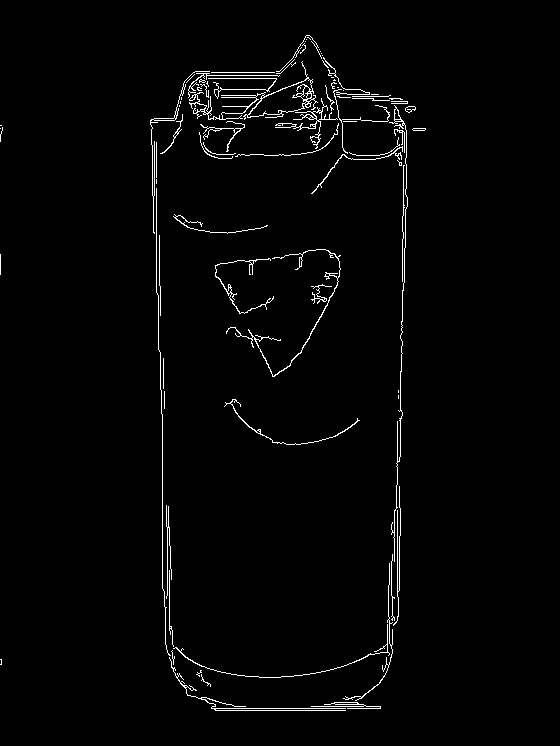

In [65]:
from PIL import Image
import cv2
import numpy as np

def get_canny_condition(row):
    
    mask = np.array(row['conditioning_image'])
    mask = 255 - mask
    image = np.array(row['image'].convert("RGB"))
    masked_image = np.ones_like(image) * 255
    masked_image[mask > 0] = image[mask > 0]
    
    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    
    otsu_thresh, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    high_threshold = otsu_thresh
    low_threshold = 0.1 * otsu_thresh
    canny_image = cv2.Canny(masked_image, int(low_threshold), int(high_threshold))
    canny_image = canny_image[:, :, None]
    canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
    canny_image = Image.fromarray(canny_image)
    return canny_image
    

def apply_mask(row):
    mask = np.array(row['conditioning_image'])
    mask = 255 - mask
    image = np.array(row['image'].convert("RGB"))
    # put to white the area like image (255)
    masked_image = np.ones_like(image) * 255
    # masked_image = np.zeros_like(image)
    masked_image[mask > 0] = image[mask > 0]
    return Image.fromarray(masked_image)

# apply mask for one example
# masked_example = apply_mask(ds['train'][6])
# masked_example

canny_condition = get_canny_condition(ds['train'][6])
canny_condition

In [66]:
# add canny_condition column inside 'conditioning_image' column
# swap existing 'conditioning_image' column with 'canny_condition'
ds['train'] = ds['train'].map(lambda x: {'conditioning_image': get_canny_condition(x)}, remove_columns=['conditioning_image'])

Map:   0%|          | 0/687 [00:00<?, ? examples/s]

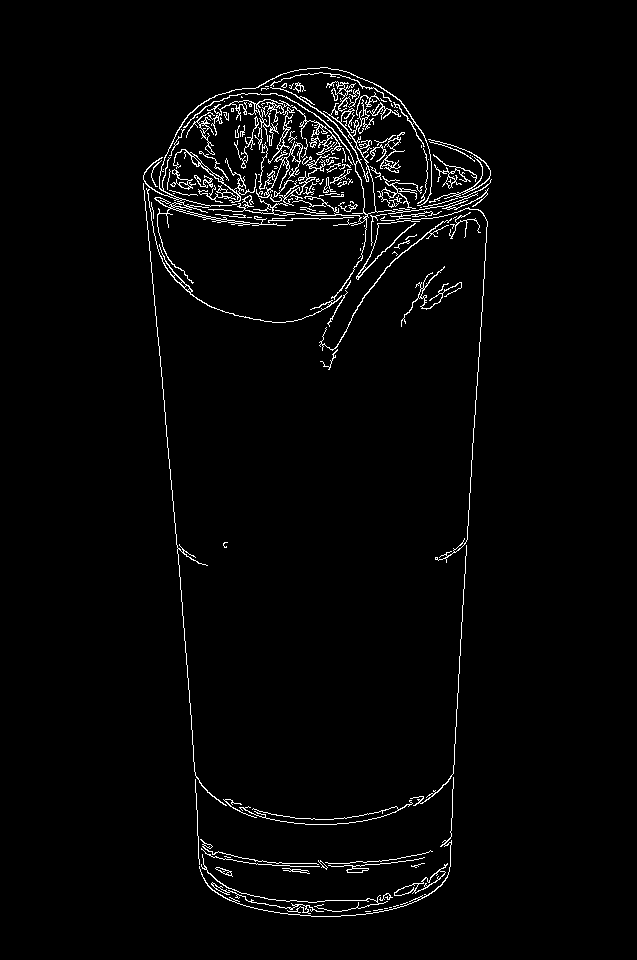

In [69]:
# show conditioning_image
ds['train'][1]['conditioning_image']

In [70]:
# push to hub
ds.push_to_hub("ThreeBibas/recipie-canny-image")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/687 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ThreeBibas/recipie-canny-image/commit/7eb3cec0834d69de6f3ebd0397a2657bda86a7c5', commit_message='Upload dataset', commit_description='', oid='7eb3cec0834d69de6f3ebd0397a2657bda86a7c5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ThreeBibas/recipie-canny-image', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ThreeBibas/recipie-canny-image'), pr_revision=None, pr_num=None)